In [206]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from datetime import datetime

print(os.getcwd())

/data/Documents/DataScience/Courses/Dissertation/src/evaluation


## CVC5 Results

In [ ]:
df = pd.read_csv('../benchmark/sygus_solver_cvc5_results_new.csv')
df.info()
df.head()

In [ ]:
df['config'] = (df['config']
                .str.replace('--tlimit=30000', '')
                .str.replace('--sygus-enum=', '')
                .str.replace('--sygus-si=', '_single_invocation_')
                .str.replace('--', '_')
                .str.replace('-', '_')
                .str.replace('=', '_')
                .str.replace(' ', '')
                )
df['file'] = df['file'].str.replace('/data/Documents/DataScience/Courses/Dissertation/problems/sygus_comp_2019_clia_track/', '').str.replace('.sl','').str.strip()
df.head(20)

In [ ]:
config_counts = df['config'].value_counts()
print("Configuration counts:")
print(config_counts)

In [ ]:
avg_time_by_config = df.groupby('config')['time'].mean().sort_values(ascending=False).reset_index()
avg_time_by_problem = df.groupby('file')['time'].mean().sort_values(ascending=False).reset_index()

print("\nAverage Execution Time by Configuration:")
print(avg_time_by_config)
print("\nAverage Execution Time by Problem:")
print(avg_time_by_problem)

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x='config', y='time', data=avg_time_by_config)
plt.title('Average Execution Time by Configuration')
plt.xlabel('Configuration')
plt.ylabel('Average Time (seconds)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [ ]:
plt.figure(figsize=(15, 6))
sns.barplot(x='file', y='time', data=avg_time_by_problem.head(30))
plt.title('Average Execution Time by Problem (Top 30)')
plt.xlabel('Problem')
plt.ylabel('Average Time (seconds)')
plt.xticks(rotation=75, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='config', y='time', data=df)
plt.title('Distribution of Execution Times by Configuration')
plt.xlabel('Configuration')
plt.ylabel('Time (seconds)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='config', y='time', data=df, showfliers=False)
plt.title('Distribution of Execution Times by Configuration (Excluding Outliers)')
plt.xlabel('Configuration')
plt.ylabel('Time (seconds)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(15, 6))
sns.boxplot(x='file', y='time', data=df[df['file'].isin(avg_time_by_problem.head(30)['file'])])
plt.title('Distribution of Execution Times by Problem (Top 30)')
plt.xlabel('Problem')
plt.ylabel('Time (seconds)')
plt.xticks(rotation=75, ha='right')
plt.tight_layout()
plt.show()


In [ ]:
return_code_mapping = {-6: 'Timeout', 1: 'Error', 0: 'Success'}
df['return_code_label'] = df['return_code'].map(return_code_mapping)

return_code_counts = df['return_code_label'].value_counts()
print("\nReturn code counts:")
print(return_code_counts)

plt.figure(figsize=(10, 6))
colors = ['#99ff99', '#66b3ff', '#ff9999']
return_code_counts.plot(kind='pie', autopct='%1.1f%%', colors=colors, explode=[0.1, 0.1, 0])
plt.title('Distribution of Return Codes', fontsize=16)
plt.ylabel('')
plt.legend(title="Return Codes", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.tight_layout()
plt.show()


In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='time', y='max_memory_usage', hue='config', data=df)
plt.title('Correlation between Execution Time and Max Memory Usage')
plt.xlabel('Execution Time (seconds)')
plt.ylabel('Max Memory Usage')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [ ]:
df['success'] = df['return_code'] == 0
success_rate = df.groupby('config')['success'].mean().sort_values(ascending=False)
print("\nSuccess Rate by Configuration:")
print(success_rate)

plt.figure(figsize=(12, 6))
success_rate.plot(kind='bar')
plt.title('Success Rate by Configuration', fontsize=16)
plt.xlabel('Configuration', fontsize=12)
plt.ylabel('Success Rate', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# PySynthLab Results

In [ ]:
df = pd.read_csv('../benchmark/sygus_solver_pysynthlab_results_new.csv')
print(df.info())

In [ ]:
df['config'] = df['config'].str.split('/').str[-1].str.replace('.yaml', '').str.replace('benchmark_','')
df['file'] = df['file'].str.split('/').str[-1].str.replace('.sl', '')
df.head()

In [ ]:
config_counts = df['config'].value_counts()
print("Configuration counts:")
print(config_counts)

In [ ]:
# 3 runs were performed with a 30 second timeout, one run at 60 and one run at 120 seconds
avg_time_by_config = df.groupby('config')['time'].mean().sort_values(ascending=False).reset_index()
avg_time_by_problem = df.groupby('file')['time'].mean().sort_values(ascending=False).reset_index()
print("\nAverage Execution Time by Configuration:")
print(avg_time_by_config)
print("\nAverage Execution Time by Problem:")
print(avg_time_by_problem)

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x='config', y='time', data=avg_time_by_config)
plt.title('Average Execution Time by Configuration')
plt.xlabel('Configuration')
plt.ylabel('Average Time (seconds)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('pysynthlab_avg_time_by_config.png')
plt.show()

In [ ]:
plt.figure(figsize=(15, 6))
sns.barplot(x='file', y='time', data=avg_time_by_problem.head(30))
plt.title('Average Execution Time by Problem (Top 30)')
plt.xlabel('Problem')
plt.ylabel('Average Time (seconds)')
plt.xticks(rotation=75, ha='right')
plt.tight_layout()
plt.savefig('pysynthlab_avg_time_by_problem.png')
plt.show()

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='config', y='time', data=df)
plt.title('Distribution of Execution Times by Configuration')
plt.xlabel('Configuration')
plt.ylabel('Time (seconds)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('pysynthlab_time_distribution_by_config.png')
plt.show()

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='config', y='time', data=df, showfliers=False)
plt.title('Distribution of Execution Times by Configuration (Excluding Outliers)')
plt.xlabel('Configuration')
plt.ylabel('Time (seconds)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('pysynthlab_time_distribution_by_config_no_outliers.png')
plt.show()

In [ ]:
plt.figure(figsize=(15, 6))
sns.boxplot(x='file', y='time', data=df[df['file'].isin(avg_time_by_problem.head(30)['file'])])
plt.title('Distribution of Execution Times by Problem (Top 30)')
plt.xlabel('Problem')
plt.ylabel('Time (seconds)')
plt.xticks(rotation=75, ha='right')
plt.tight_layout()
plt.savefig('pysynthlab_time_distribution_by_problem.png')
plt.show()

In [ ]:
return_code_mapping = {-15: 'Timeout', 1: 'Error', 0: 'Success'}
df['return_code_label'] = df['return_code'].map(return_code_mapping)

return_code_counts = df['return_code_label'].value_counts()
print("\nReturn code counts:")
print(return_code_counts)
plt.figure(figsize=(10, 6))
colors = ['#66b3ff', '#99ff99','#ff9999']
return_code_counts.plot(kind='pie', autopct='%1.1f%%', colors=colors, explode=[0.1, 0.1, 0])
plt.title('Distribution of Return Codes', fontsize=16)
plt.ylabel('')
plt.legend(title="Return Codes", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.tight_layout()
plt.savefig('pysynthlab_return_code_distribution.png')
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='time', y='max_memory_usage', hue='config', data=df)
plt.title('Correlation between Execution Time and Max Memory Usage')
plt.xlabel('Execution Time (seconds)')
plt.ylabel('Max Memory Usage')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('pysynthlab_time_vs_memory.png')
plt.show()

In [ ]:
df['success'] = df['return_code'] == 0
success_rate = df.groupby('config')['success'].mean().sort_values(ascending=False)
print("\nSuccess Rate by Configuration:")
print(success_rate)
plt.figure(figsize=(12, 6))
success_rate.plot(kind='bar')
plt.title('Success Rate by Configuration', fontsize=16)
plt.xlabel('Configuration', fontsize=12)
plt.ylabel('Success Rate', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('pysynthlab_success_rate_by_config.png')
plt.show()

In [ ]:
avg_memory_by_config = df.groupby('config')['max_memory_usage'].mean().sort_values(ascending=False).reset_index()

print("\nAverage Memory Usage by Configuration:")
print(avg_memory_by_config)

plt.figure(figsize=(12, 6))
sns.barplot(x='config', y='max_memory_usage', data=avg_memory_by_config)
plt.title('Average Memory Usage by Configuration')
plt.xlabel('Configuration')
plt.ylabel('Average Max Memory Usage')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('pysynthlab_avg_memory_by_config.png')
plt.show()

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='config', y='max_memory_usage', data=df, showfliers=False)
plt.title('Distribution of Memory Usage by Configuration (Excluding Outliers)')
plt.xlabel('Configuration')
plt.ylabel('Max Memory Usage')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('pysynthlab_memory_distribution_by_config.png')
plt.show()

In [ ]:
metrics_to_analyze = ['candidates_generated', 'iterations', 'time_spent', 'solution_height']
for metric in metrics_to_analyze:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='config', y=metric, data=df)
    plt.title(f'Distribution of {metric} by Configuration')
    plt.xlabel('Configuration')
    plt.ylabel(metric)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.savefig(f'pysynthlab_{metric}_distribution.png')
    plt.show()

    avg_metric = df.groupby('config')[metric].mean().sort_values(ascending=False)
    print(f"\nAverage {metric} by Configuration:")
    print(avg_metric)

In [ ]:
correlation = df[metrics_to_analyze + ['time', 'max_memory_usage']].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation of PySynthLab Metrics')
plt.tight_layout()
plt.savefig('pysynthlab_metrics_correlation.png')
plt.show()

## Comparison between CVC5 and PySynthLab on the same problems

In [173]:
df_cvc5 = pd.read_csv('../benchmark/sygus_solver_cvc5_results_new.csv')
df_cvc5['config'] = (df_cvc5['config']
                .str.replace('--tlimit=30000', '')
                .str.replace('--sygus-enum=', '')
                .str.replace('--sygus-si=', '_single_invocation_')
                .str.replace('--', '_')
                .str.replace('-', '_')
                .str.replace('=', '_')
                .str.replace(' ', '')
                )
df_cvc5['file'] = df_cvc5['file'].str.replace('/data/Documents/DataScience/Courses/Dissertation/problems/sygus_comp_2019_clia_track/', '').str.replace('.sl','').str.strip()


df_pysynthlab = pd.read_csv('../benchmark/sygus_solver_pysynthlab_results_new.csv')
df_pysynthlab['run_datetime'] = pd.to_datetime(df_pysynthlab['run_datetime'])
df_pysynthlab['solver'] = 'PySynthLab'
df_pysynthlab['config'] = df_pysynthlab['config'].str.split('/').str[-1].str.replace('.yaml', '').str.replace('benchmark_','')
df_pysynthlab['file'] = df_pysynthlab['file'].str.split('/').str[-1].str.replace('.sl', '')
df_pysynthlab.rename(columns={'avg_cpu_percentage': 'avg_cpu_usage'}, inplace=True)
cutoff_time = datetime(2024, 8, 14, 1, 48, 7, 511884)
df_pysynthlab = df_pysynthlab[df_pysynthlab['run_datetime'] <= cutoff_time]


In [180]:
df_pysynthlab.describe()

,run_datetime,return_code,time,avg_cpu_usage,max_memory_usage,candidates_generated,candidates_pruned,iterations,time_spent,solution_height,solution_complexity,best_partial_score,grammar_size,solution_space_coverage,solver_calls,unique_patterns,pattern_reuse_ratio
count,1481,1481.000000,1481.000000,1481.000000,1481.000000,130.000000,130.0,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.0,130.000000,130.000000,130.000000
mean,2024-08-13 20:59:36.491803648,-13.665766,27.911721,5.670848,114.128149,338.438462,0.0,236.753846,5.208107,0.492308,0.838462,0.284547,8.676923,0.0,179.484615,32.938462,0.183897
min,2024-08-12 21:44:47.838685,-15.000000,1.000902,4.802083,0.000000,1.000000,0.0,1.000000,0.013561,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,2024-08-13 16:59:29.661627904,-15.000000,30.015199,4.892778,117.828125,9.250000,0.0,1.000000,0.086882,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
50%,2024-08-13 21:25:54.859593984,-15.000000,30.015797,4.937361,119.902344,136.000000,0.0,9.000000,3.379284,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
75%,2024-08-14 01:48:07.511884032,-15.000000,30.016419,5.340278,121.320312,356.000000,0.0,104.500000,7.755631,1.000000,1.000000,0.750000,24.000000,0.0,106.000000,23.000000,0.500000
max,2024-08-14 01:48:07.511884,1.000000,30.023669,17.011111,130.503906,3488.000000,0.0,3488.000000,29.517248,3.000000,7.000000,1.000000,24.000000,0.0,3440.000000,536.000000,0.618459
std,NaN,4.304268,7.056401,1.671067,22.310209,638.830569,0.0,644.355264,6.589068,0.673371,1.549213,0.403808,11.575311,0.0,464.560762,79.475680,0.249842


In [181]:
df_cvc5.describe()

,return_code,time,avg_cpu_usage,max_memory_usage
count,3783.000000,3783.000000,3783.000000,3783.000000
mean,-0.401269,2.938548,22.517451,13.774001
std,1.592459,8.218277,37.965960,30.978782
min,-6.000000,0.100416,0.000000,0.000000
25%,0.000000,0.101515,0.000000,0.195312
50%,0.000000,0.101695,0.000000,0.246094
75%,0.000000,0.201671,44.850000,29.503906
max,1.000000,32.486532,99.563000,573.394531


In [179]:
df = pd.concat([df_pysynthlab, df_cvc5], ignore_index=True)
df.head()
df.describe()

,return_code,time,avg_cpu_usage,max_memory_usage,candidates_generated,candidates_pruned,iterations,time_spent,solution_height,solution_complexity,best_partial_score,grammar_size,solution_space_coverage,solver_calls,unique_patterns,pattern_reuse_ratio
count,5264.000000,5264.000000,5264.000000,5264.000000,130.000000,130.0,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.0,130.000000,130.000000,130.000000
mean,-4.133169,9.964625,17.777744,42.008138,338.438462,0.0,236.753846,5.208107,0.492308,0.838462,0.284547,8.676923,0.0,179.484615,32.938462,0.183897
std,6.527913,13.735290,33.075395,53.537225,638.830569,0.0,644.355264,6.589068,0.673371,1.549213,0.403808,11.575311,0.0,464.560762,79.475680,0.249842
min,-15.000000,0.100416,0.000000,0.000000,1.000000,0.0,1.000000,0.013561,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,-15.000000,0.101600,0.000000,0.222656,9.250000,0.0,1.000000,0.086882,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
50%,0.000000,0.102256,0.000000,0.570312,136.000000,0.0,9.000000,3.379284,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
75%,0.000000,30.015345,7.036146,105.821289,356.000000,0.0,104.500000,7.755631,1.000000,1.000000,0.750000,24.000000,0.0,106.000000,23.000000,0.500000
max,1.000000,32.486532,99.563000,573.394531,3488.000000,0.0,3488.000000,29.517248,3.000000,7.000000,1.000000,24.000000,0.0,3440.000000,536.000000,0.618459


In [184]:
completion_rate = df.groupby('solver')['return_code'].apply(lambda x: (x == 0).mean())
print("\nCompletion Rate by Solver:")
print(completion_rate)
avg_time = df.groupby('solver')['time'].mean()
avg_memory = df.groupby('solver')['max_memory_usage'].mean()
avg_cpu = df.groupby('solver')['avg_cpu_usage'].mean()
print("\nAverage Execution Time by Solver:")
print(avg_time)
print("\nAverage Memory Usage (MB) by Solver:")
print(avg_memory)
print("\nAverage CPU Usage (%) by Solver:")
print(avg_cpu)


Completion Rate by Solver:
solver
PySynthLab    0.070223
cvc5          0.885012
Name: return_code, dtype: float64

Average Execution Time by Solver:
solver
PySynthLab    27.911721
cvc5           2.938548
Name: time, dtype: float64

Average Memory Usage (MB) by Solver:
solver
PySynthLab    114.128149
cvc5           13.774001
Name: max_memory_usage, dtype: float64

Average CPU Usage (%) by Solver:
solver
PySynthLab     5.670848
cvc5          22.517451
Name: avg_cpu_usage, dtype: float64


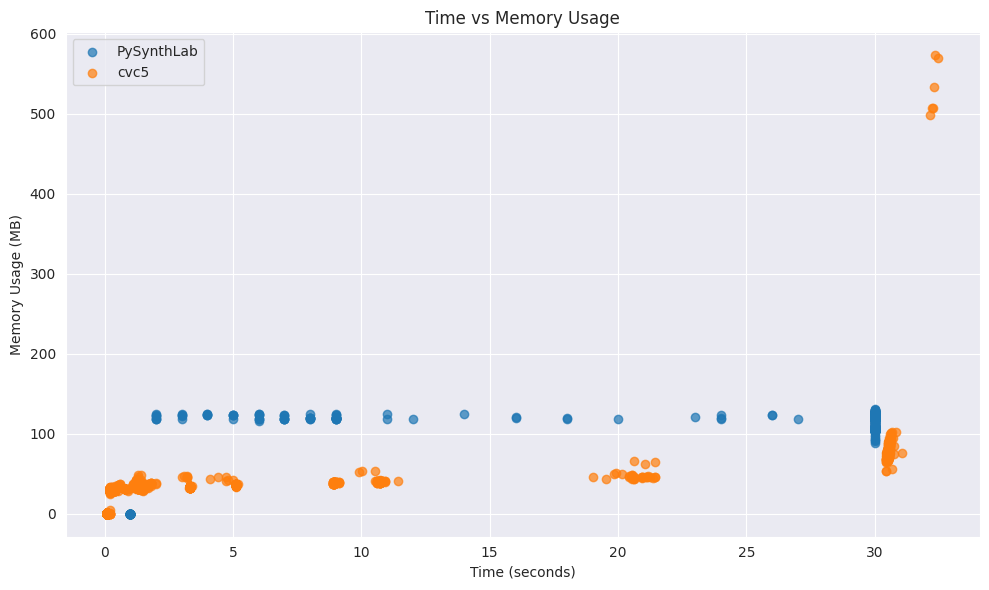

In [185]:
plt.figure(figsize=(10, 6))
for solver in df['solver'].unique():
    solver_data = df[df['solver'] == solver]
    plt.scatter(solver_data['time'], solver_data['max_memory_usage'], label=solver, alpha=0.7)
plt.title('Time vs Memory Usage')
plt.xlabel('Time (seconds)')
plt.ylabel('Memory Usage (MB)')
plt.legend()
plt.tight_layout()
plt.savefig('time_vs_memory_scatter.png')
plt.show()

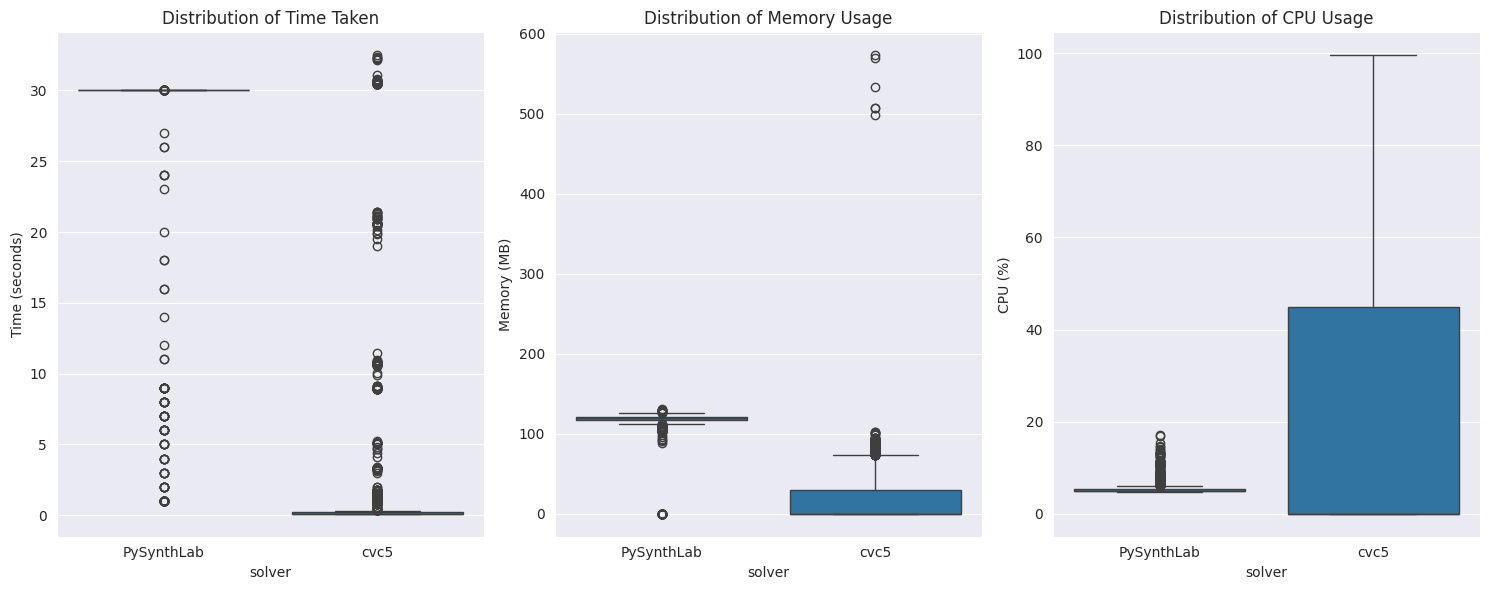

In [187]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 6))
sns.boxplot(x='solver', y='time', data=df, ax=ax1)
ax1.set_title('Distribution of Time Taken')
ax1.set_ylabel('Time (seconds)')
sns.boxplot(x='solver', y='max_memory_usage', data=df, ax=ax2)
ax2.set_title('Distribution of Memory Usage')
ax2.set_ylabel('Memory (MB)')
sns.boxplot(x='solver', y='avg_cpu_usage', data=df, ax=ax3)
ax3.set_title('Distribution of CPU Usage')
ax3.set_ylabel('CPU (%)')
plt.tight_layout()
plt.savefig('time_vs_memory_vs_cpu_boxplot.png')

In [188]:
benchmark_performance = df.groupby(['solver', 'file']).agg({
    'return_code': lambda x: (x == 0).mean(),
    'time': 'mean',
    'max_memory_usage': 'mean'
}).reset_index()

time_diff = benchmark_performance.pivot(index='file', columns='solver', values='time')
time_diff['difference'] = time_diff['PySynthLab'] - time_diff['cvc5']
time_diff = time_diff.sort_values('difference')

print("\nBenchmarks where PySynthLab outperforms cvc5 (in terms of time):") # 😭
print(time_diff[time_diff['difference'] < 0].head())

print("\nBenchmarks where cvc5 outperforms PySynthLab (in terms of time):")
print(time_diff[time_diff['difference'] > 0].head())


Benchmarks where PySynthLab outperforms cvc5 (in terms of time):
Empty DataFrame
Columns: [PySynthLab, cvc5, difference]
Index: []

Benchmarks where cvc5 outperforms PySynthLab (in terms of time):
solver              PySynthLab       cvc5  difference
file                                                 
small_linear_func    30.016124  26.004852    4.011271
large_linear_func    30.016375  26.003650    4.012725
max20                30.016544  21.452446    8.564098
jmbl_fg_polynomial    9.739912   0.101562    9.638351
absolute             11.598561   0.101614   11.496947


## Partial Strategy Parameters

In [194]:
df_pysynthlab_partial = pd.read_csv('../benchmark/sygus_solver_pysynthlab_results_partial.csv')
df_pysynthlab_partial['run_datetime'] = pd.to_datetime(df_pysynthlab_partial['run_datetime'])
df_pysynthlab_partial['solver'] = 'PySynthLab'
df_pysynthlab_partial['config'] = df_pysynthlab_partial['config'].str.split('/').str[-1].str.replace('.yaml', '').str.replace('benchmark_','')
df_pysynthlab_partial['file'] = df_pysynthlab_partial['file'].str.split('/').str[-1].str.replace('.sl', '')
df_pysynthlab_partial.head()

,run_id,run_datetime,solver,config,file,param_varied,param_value,return_code,time,avg_cpu_percentage,...,time_spent,solution_height,solution_complexity,best_partial_score,grammar_size,solution_found,solution_space_coverage,solver_calls,unique_patterns,pattern_reuse_ratio
0,0ef829ba-419c-4c4c-8df5-ff3165c0a351,2024-08-15 08:21:14.311818,PySynthLab,temp_max_depth_3_config,jmbl_fg_polynomial1,max_depth,3.0,0,12.005951,7.817708,...,11.457154,1.0,1.0,0.5,0.0,True,0.0,342.0,75.0,0.506579
1,0ef829ba-419c-4c4c-8df5-ff3165c0a351,2024-08-15 08:21:14.311818,PySynthLab,temp_max_depth_4_config,jmbl_fg_polynomial1,max_depth,4.0,-15,30.018171,7.997778,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0ef829ba-419c-4c4c-8df5-ff3165c0a351,2024-08-15 08:21:14.311818,PySynthLab,temp_max_depth_5_config,jmbl_fg_polynomial1,max_depth,5.0,-15,30.015271,8.614722,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0ef829ba-419c-4c4c-8df5-ff3165c0a351,2024-08-15 08:21:14.311818,PySynthLab,temp_max_depth_6_config,jmbl_fg_polynomial1,max_depth,6.0,0,29.013892,7.720977,...,28.169340,1.0,1.0,0.5,0.0,True,0.0,549.0,115.0,0.528689
4,0ef829ba-419c-4c4c-8df5-ff3165c0a351,2024-08-15 08:21:14.311818,PySynthLab,temp_max_depth_7_config,jmbl_fg_polynomial1,max_depth,7.0,-15,30.015929,7.857639,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [196]:
grouped = df_pysynthlab_partial.groupby(['file', 'param_varied', 'param_value'])
grouped.describe()

run_datetime  \
                                                             count   
file         param_varied                 param_value                
jmbl_fg_max2 cost_multiplier              0.5                    4   
                                          1.0                    4   
                                          1.5                    4   
                                          2.0                    4   
             max_candidates_at_each_depth 5.0                    4   
...                                                            ...   
max3         max_depth                    5.0                    4   
                                          6.0                    4   
                                          7.0                    4   
                                          8.0                    4   
                                          9.0                    4   

                                                                                      \
                                                                                mean   
file         param_varied                 param_value                                  
jmbl_fg_max2 cost_multiplier              0.5          2024-08-15 15:43:34.425034240   
                                          1.0          2024-08-15 15:43:34.425034240   
                                          1.5          2024-08-15 15:43:34.425034240   
                                          2.0          2024-08-15 15:43:34.425034240   
             max_candidates_at_each_depth 5.0          2024-08-15 15:43:34.425034240   
...                                                                              ...   
max3         max_depth                    5.0          2024-08-15 15:43:34.425034240   
                                          6.0          2024-08-15 15:43:34.425034240   
                                          7.0          2024-08-15 15:43:34.425034240   
                                          8.0          2024-08-15 15:43:34.425034240   
                                          9.0          2024-08-15 15:43:34.425034240   

                                                                                   \
                                                                              min   
file         param_varied                 param_value                               
jmbl_fg_max2 cost_multiplier              0.5          2024-08-15 08:21:14.311818   
                                          1.0          2024-08-15 08:21:14.311818   
                                          1.5          2024-08-15 08:21:14.311818   
                                          2.0          2024-08-15 08:21:14.311818   
             max_candidates_at_each_depth 5.0          2024-08-15 08:21:14.311818   
...                                                                           ...   
max3         max_depth                    5.0          2024-08-15 08:21:14.311818   
                                          6.0          2024-08-15 08:21:14.311818   
                                          7.0          2024-08-15 08:21:14.311818   
                                          8.0          2024-08-15 08:21:14.311818   
                                          9.0          2024-08-15 08:21:14.311818   

                                                                                      \
                                                                                 25%   
file         param_varied                 param_value                                  
jmbl_fg_max2 cost_multiplier              0.5          2024-08-15 15:22:31.336688896   
                                          1.0          2024-08-15 15:22:31.336688896   
                                          1.5          2024-08-15 15:22:31.336688896   
                                          2.0          2024-08-15 15:22:31.336688896   
             max_candidates_at_ea

In [197]:
performance = grouped.agg({
    'time': 'mean',
    'avg_cpu_percentage': 'mean',
    'max_memory_usage': 'mean',
    'candidates_generated': 'mean',
    'candidates_pruned': 'mean',
    'iterations': 'mean',
    'time_spent': 'mean',
    'solution_height': 'mean',
    'solution_complexity': 'mean',
    'best_partial_score': 'max',
    'solution_found': 'sum'
}).reset_index()
performance.head()

,file,param_varied,param_value,time,avg_cpu_percentage,max_memory_usage,candidates_generated,candidates_pruned,iterations,time_spent,solution_height,solution_complexity,best_partial_score,solution_found
0,jmbl_fg_max2,cost_multiplier,0.5,2.753591,9.184375,137.408203,119.500000,0.0,60.000000,1.995807,0.75,0.75,1.000000,3
1,jmbl_fg_max2,cost_multiplier,1.0,21.514234,8.220569,137.620117,688.000000,0.0,344.000000,12.564078,1.00,2.00,1.000000,2
2,jmbl_fg_max2,cost_multiplier,1.5,4.754291,14.628715,138.143555,227.000000,0.0,114.000000,3.800026,0.50,0.50,1.000000,2
3,jmbl_fg_max2,cost_multiplier,2.0,8.505466,8.459683,137.287109,446.500000,0.0,223.750000,7.859923,0.50,1.25,1.000000,2
4,jmbl_fg_max2,max_candidates_at_each_depth,5.0,11.507429,8.704722,137.660156,275.333333,0.0,138.666667,4.437829,0.00,0.00,0.666667,0


In [198]:
best_params = performance.loc[performance.groupby('file')['best_partial_score'].idxmax()]
print("Best parameters for each problem:")
print(best_params[['file', 'param_varied', 'param_value', 'best_partial_score']])
    

Best parameters for each problem:
                   file     param_varied  param_value  best_partial_score
0          jmbl_fg_max2  cost_multiplier          0.5                1.00
29  jmbl_fg_polynomial1  cost_multiplier          0.5                0.50
58                 max3  cost_multiplier          0.5                0.75


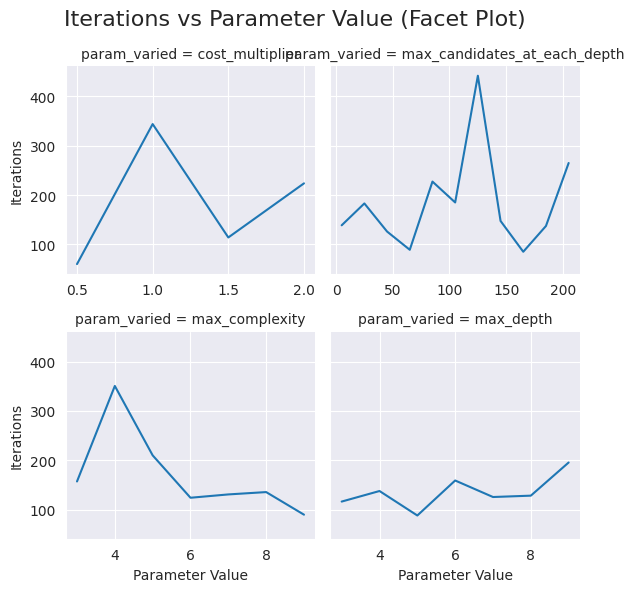

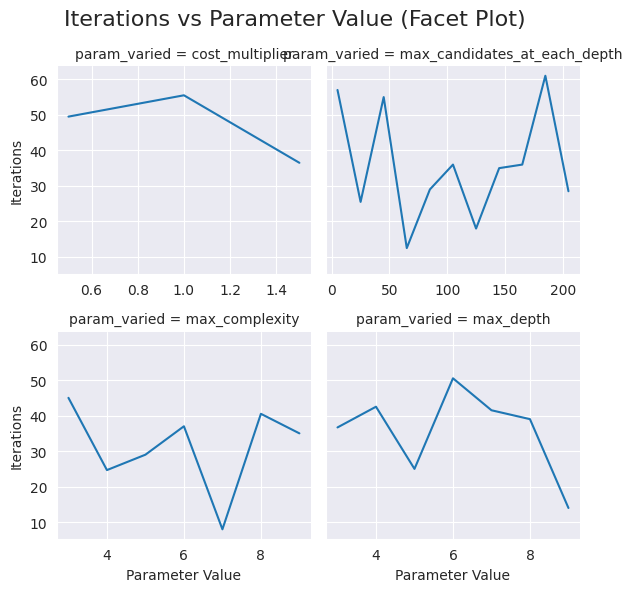

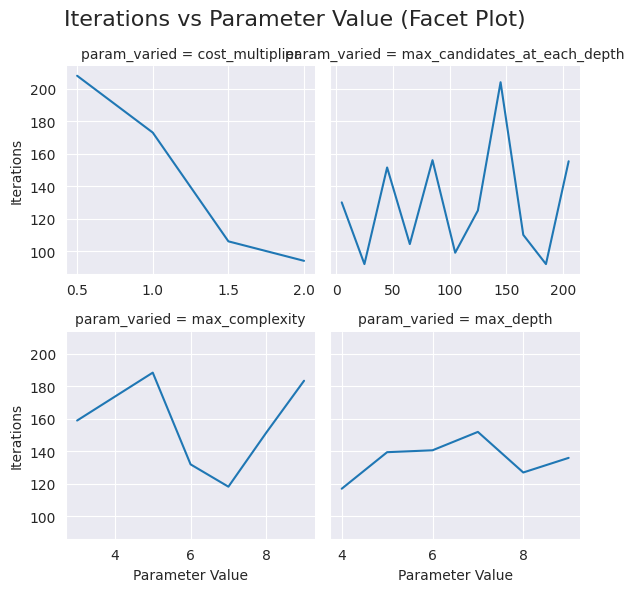

In [212]:
for problem in performance['file'].unique():
    problem_data = performance[performance['file'] == problem] 

    g = sns.FacetGrid(problem_data, col="param_varied", col_wrap=2, height=3, sharex=False)
    g.map(sns.lineplot, "param_value", "iterations")
    g.fig.suptitle('Iterations vs Parameter Value (Facet Plot)', fontsize=16)
    g.set_axis_labels("Parameter Value", "Iterations")
    plt.tight_layout()
    plt.show()


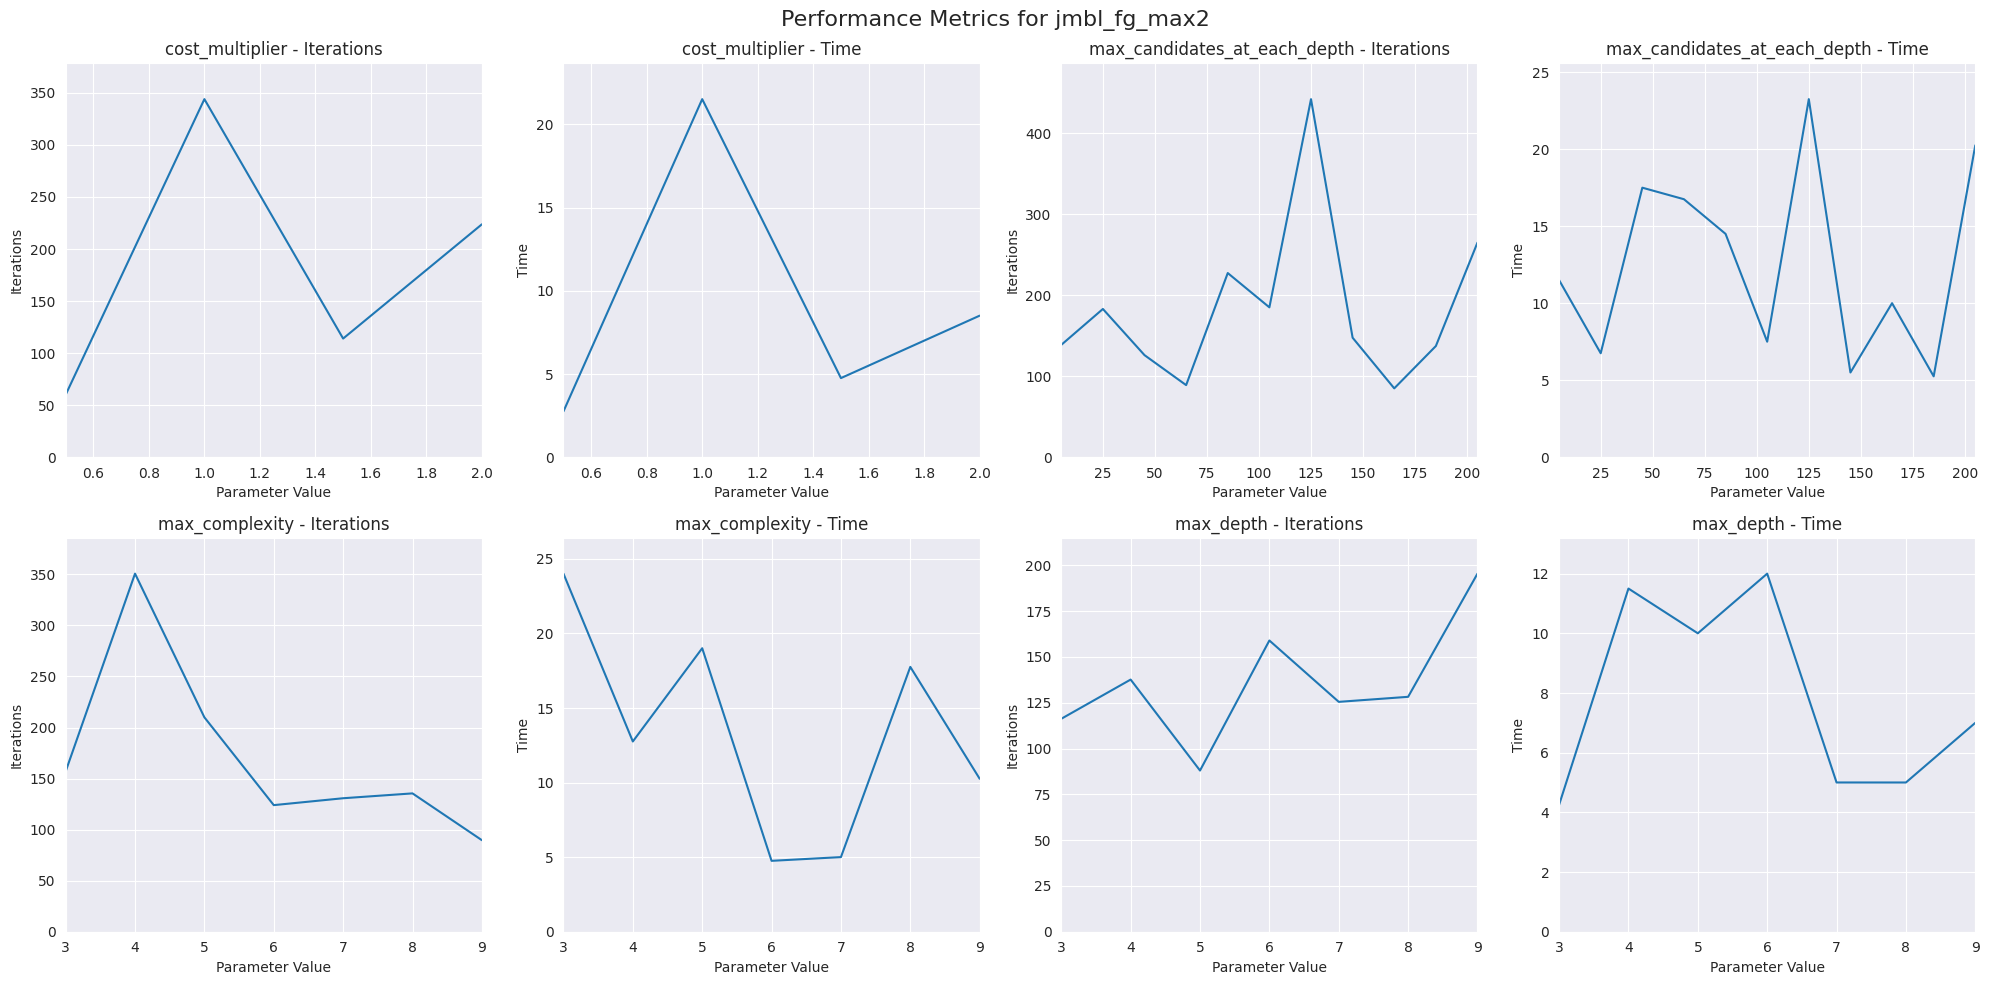

<Figure size 640x480 with 0 Axes>

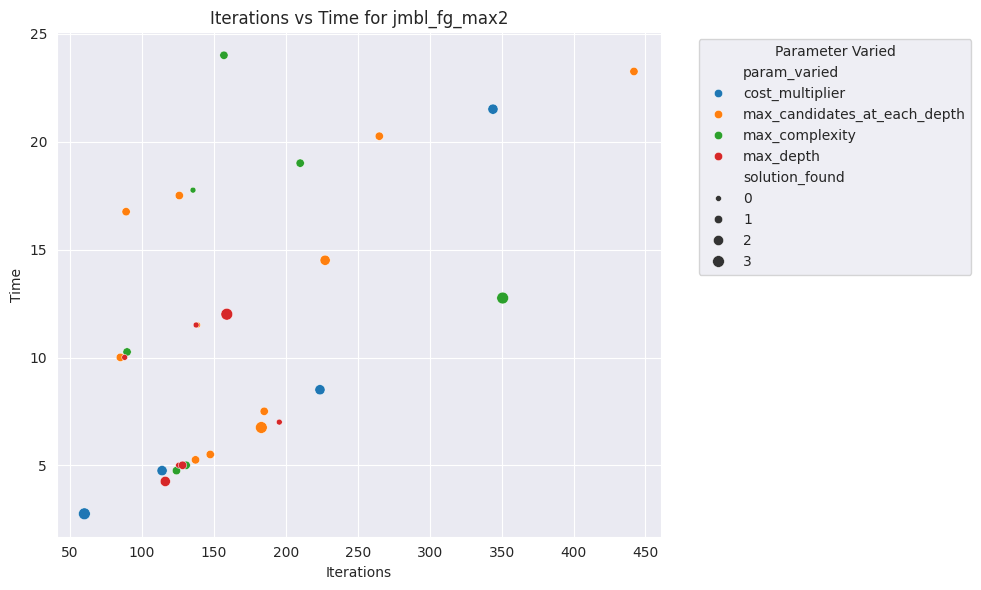

<Figure size 640x480 with 0 Axes>

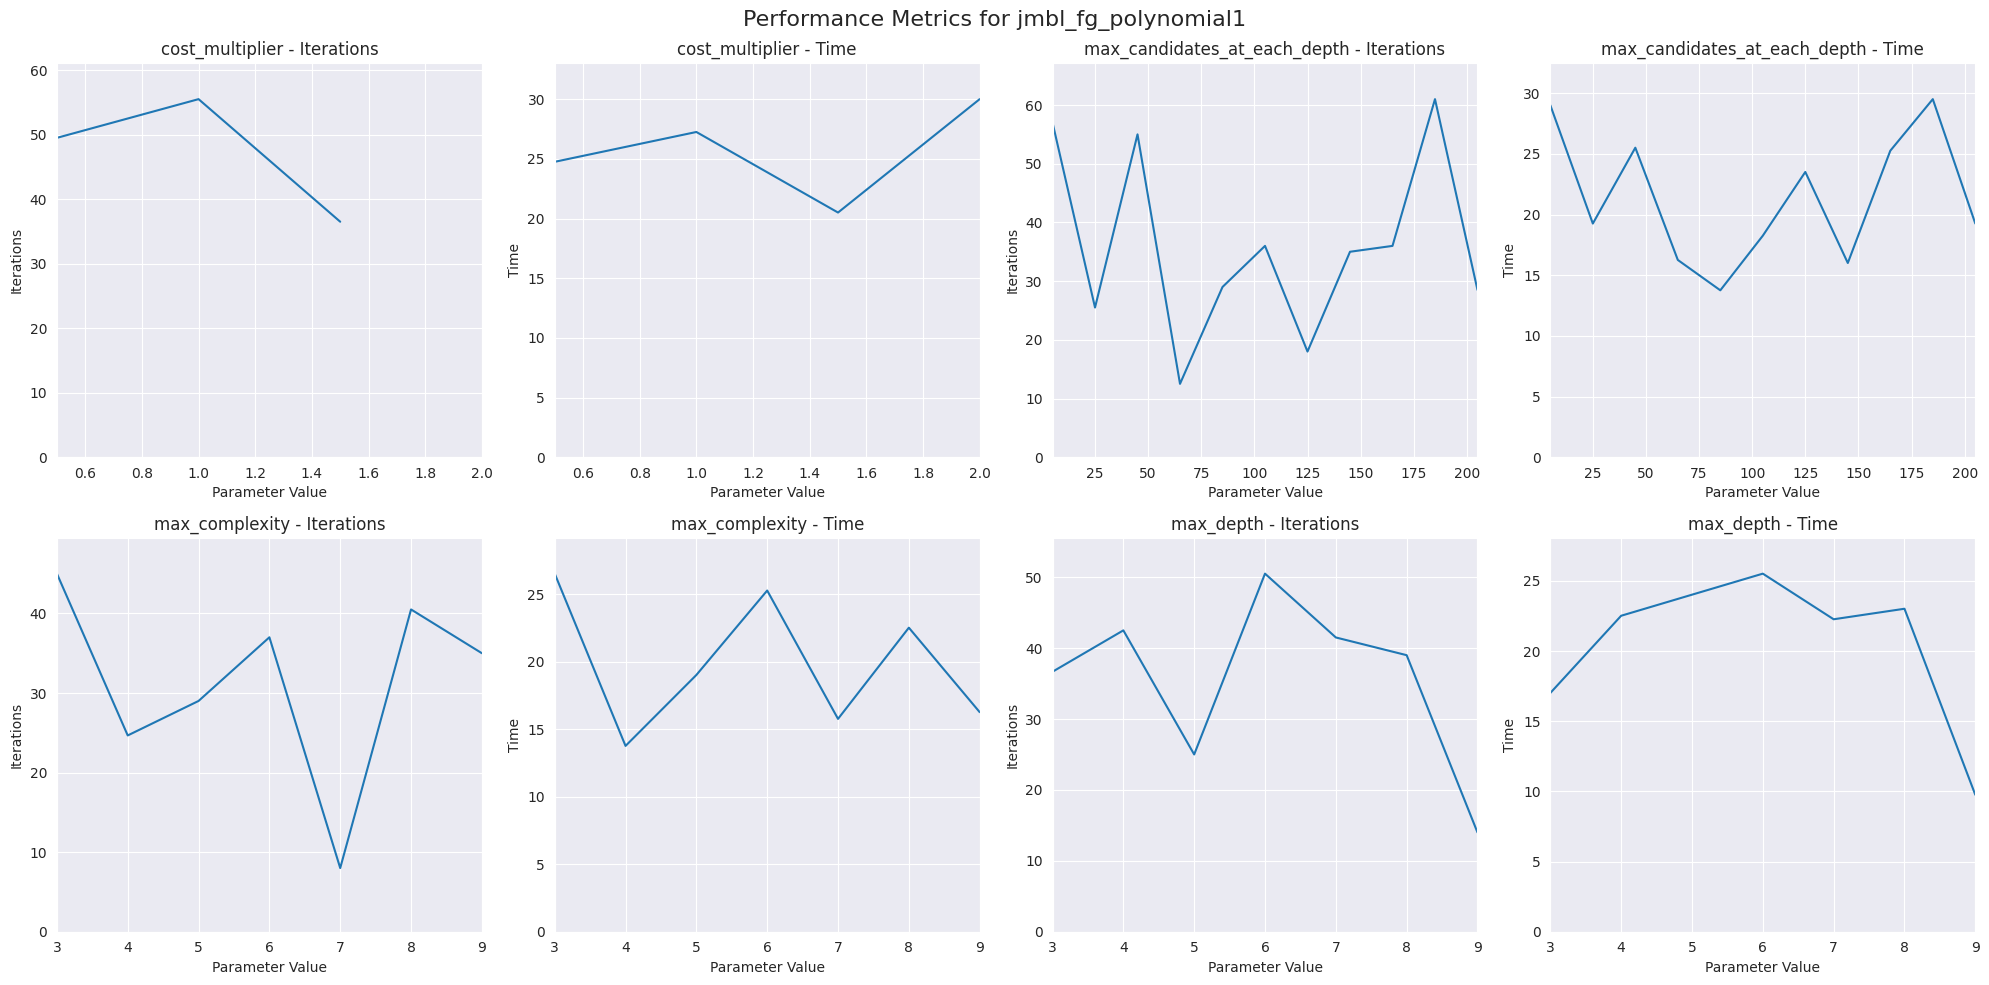

<Figure size 640x480 with 0 Axes>

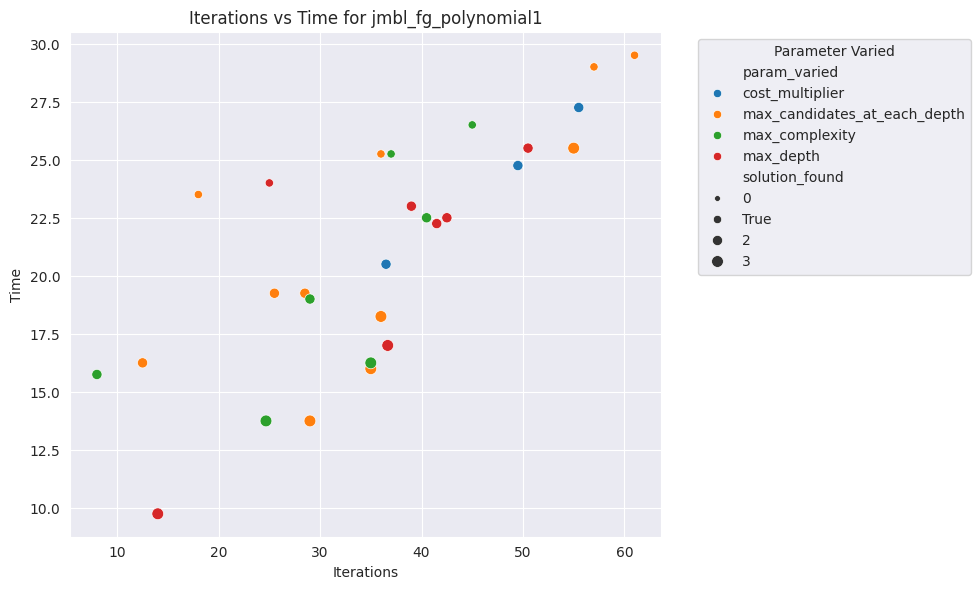

<Figure size 640x480 with 0 Axes>

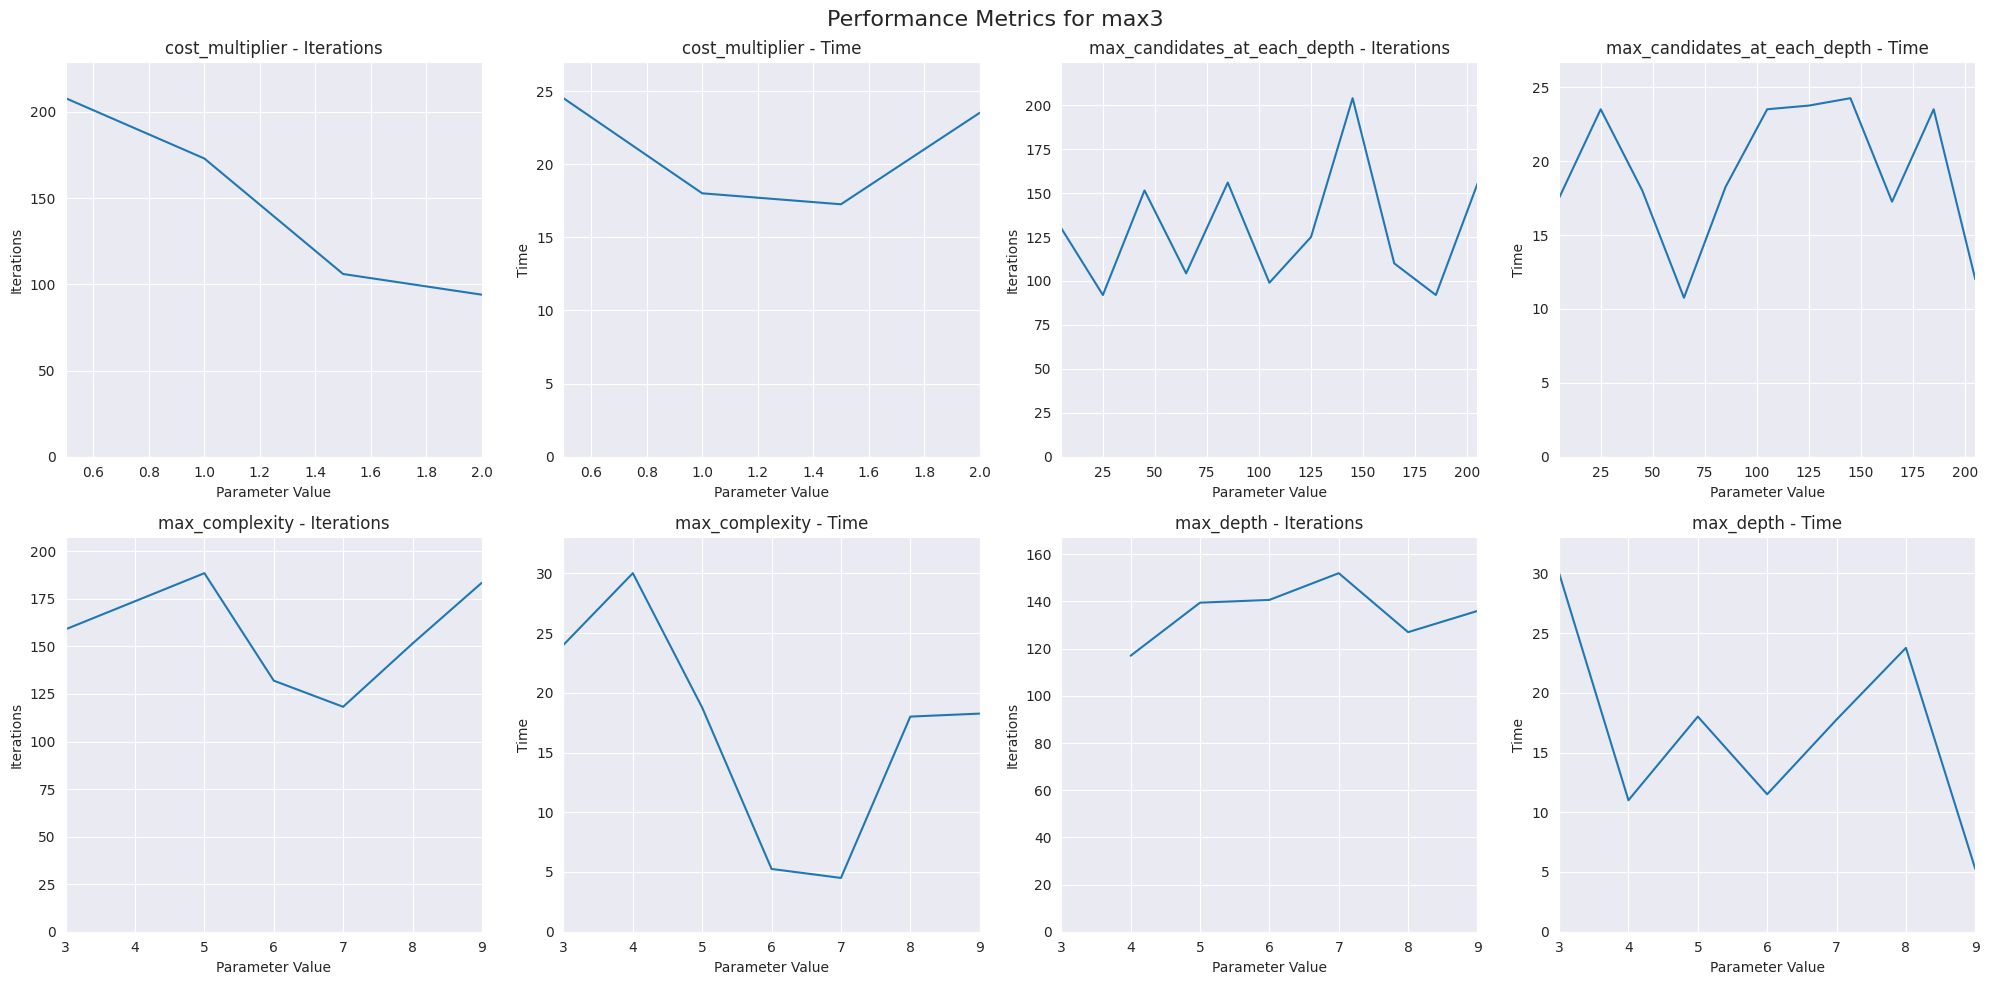

<Figure size 640x480 with 0 Axes>

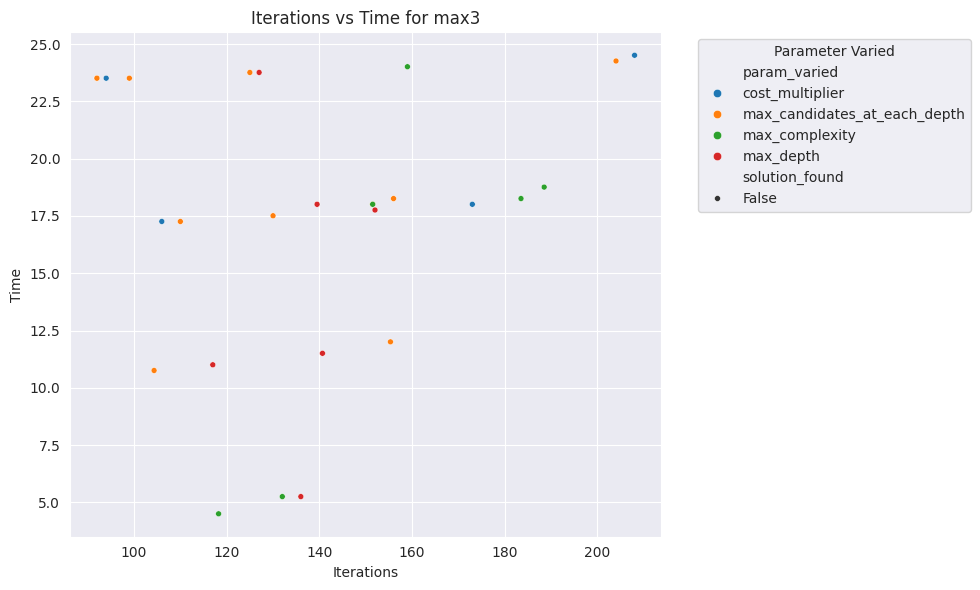

<Figure size 640x480 with 0 Axes>

In [225]:
import matplotlib.pyplot as plt
import seaborn as sns

for problem in performance['file'].unique():
    problem_data = performance[performance['file'] == problem]
    params = problem_data['param_varied'].unique()
    n_params = len(params)
    n_rows = (n_params + 1) // 2

    # itr, time subplts
    fig, axes = plt.subplots(n_rows, 4, figsize=(20, 5*n_rows))
    fig.suptitle(f'Performance Metrics for {problem}', fontsize=16)

    for i, param in enumerate(params):
        param_data = problem_data[problem_data['param_varied'] == param]

        # iterations
        ax_iter = axes[i//2, i%2*2]
        sns.lineplot(data=param_data, x="param_value", y="iterations", ax=ax_iter)
        ax_iter.set_title(f'{param} - Iterations')
        ax_iter.set_xlabel("Parameter Value")
        ax_iter.set_ylabel("Iterations")

        # time
        ax_time = axes[i//2, i%2*2+1]
        sns.lineplot(data=param_data, x="param_value", y="time", ax=ax_time)
        ax_time.set_title(f'{param} - Time')
        ax_time.set_xlabel("Parameter Value")
        ax_time.set_ylabel("Time")

        ax_iter.set_xlim(param_data['param_value'].min(), param_data['param_value'].max())
        ax_time.set_xlim(param_data['param_value'].min(), param_data['param_value'].max())
        ax_iter.set_ylim(0, param_data['iterations'].max() * 1.1)
        ax_time.set_ylim(0, param_data['time'].max() * 1.1)

    for i in range(n_params, n_rows*2):
        fig.delaxes(axes[i//2, i%2*2])
        fig.delaxes(axes[i//2, i%2*2+1])

    plt.tight_layout()
    plt.show()
    plt.savefig(f'{problem}_metrics_line_facet_itr_vs_time.png')
    
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=problem_data, x='iterations', y='time', hue='param_varied', size='solution_found')
    plt.title(f'Iterations vs Time for {problem}')
    plt.xlabel('Iterations')
    plt.ylabel('Time')
    plt.legend(title='Parameter Varied', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()
    plt.savefig(f'{problem}_scatter_metrics_itr_vs_time.png')

In [221]:
param_impact = performance.groupby('param_varied').agg({
    'best_partial_score': 'mean',
    'time': 'mean',
    'candidates_generated': 'mean',
    'solution_complexity': 'mean'
}).reset_index()

print("\nImpact of different parameters across all problems:")
param_impact


Impact of different parameters across all problems:


,param_varied,best_partial_score,time,candidates_generated,solution_complexity
0,cost_multiplier,0.772727,18.615129,291.000000,0.681818
1,max_candidates_at_each_depth,0.739899,17.783065,255.419192,0.573232
2,max_complexity,0.733333,16.736170,255.883333,0.591667
3,max_depth,0.683333,15.056735,224.941667,0.450000


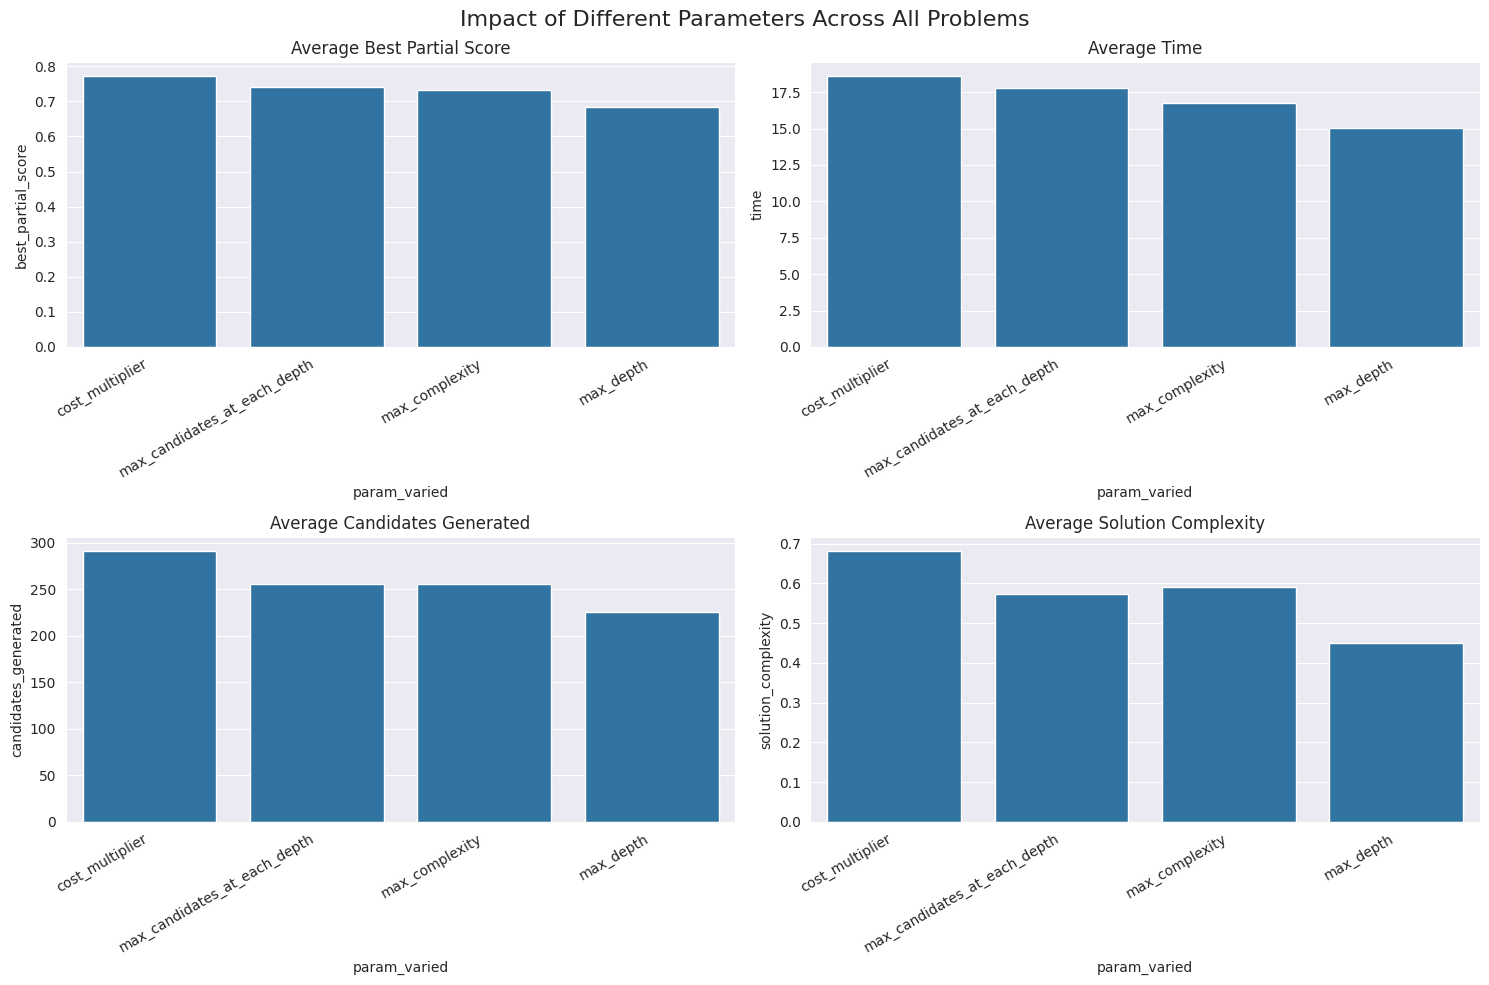

In [222]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Influence of Parameters Across All Problems', fontsize=16)

for i, metric in enumerate(['best_partial_score', 'time', 'candidates_generated', 'solution_complexity']):
    sns.barplot(data=param_impact, x='param_varied', y=metric, ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(f'Average {metric.replace("_", " ").title()}')
    ticks = axes[i//2, i%2].get_xticks()
    labels = [item.get_text() for item in axes[i//2, i%2].get_xticklabels()]
    axes[i//2, i%2].set_xticks(ticks)
    axes[i//2, i%2].set_xticklabels(labels, rotation=30, ha='right')
plt.tight_layout()
plt.show()